## Gantt charts with Python’s Matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('PLAN.xlsx')
df

,Task,Department,Start,End,Completion
0,M,IT,2022-03-17,2022-03-20,0.0
1,N,MKT,2022-03-17,2022-03-19,0.0
2,L,ENG,2022-03-10,2022-03-13,0.0
3,K,PROD,2022-03-09,2022-03-13,0.0
4,J,PROD,2022-03-04,2022-03-17,0.0
5,H,FIN,2022-02-28,2022-03-02,1.0
6,I,MKT,2022-02-28,2022-03-05,0.4
7,G,FIN,2022-02-27,2022-03-03,0.7
8,F,MKT,2022-02-26,2022-02-27,1.0
9,E,ENG,2022-02-23,2022-03-09,0.5


In [2]:
# project start date
proj_start = df.Start.min()       # number of days from project start to task start
df['start_num'] = (df.Start-proj_start).dt.days    # number of days from project start to end of tasks
df['end_num'] = (df.End-proj_start).dt.days        # days between start and end of each task
df['days_start_to_end'] = df.end_num - df.start_num
df

,Task,Department,Start,End,Completion,start_num,end_num,days_start_to_end
0,M,IT,2022-03-17,2022-03-20,0.0,30,33,3
1,N,MKT,2022-03-17,2022-03-19,0.0,30,32,2
2,L,ENG,2022-03-10,2022-03-13,0.0,23,26,3
3,K,PROD,2022-03-09,2022-03-13,0.0,22,26,4
4,J,PROD,2022-03-04,2022-03-17,0.0,17,30,13
5,H,FIN,2022-02-28,2022-03-02,1.0,13,15,2
6,I,MKT,2022-02-28,2022-03-05,0.4,13,18,5
7,G,FIN,2022-02-27,2022-03-03,0.7,12,16,4
8,F,MKT,2022-02-26,2022-02-27,1.0,11,12,1
9,E,ENG,2022-02-23,2022-03-09,0.5,8,22,14


In [3]:
# fig, ax = plt.subplots(1, figsize=(16,6))
# ax.barh(df.Task, df.days_start_to_end, left=df.start_num)
# plt.show()

Index(['02/15', '02/16', '02/17', '02/18', '02/19', '02/20', '02/21', '02/22',
       '02/23', '02/24', '02/25', '02/26', '02/27', '02/28', '03/01', '03/02',
       '03/03', '03/04', '03/05', '03/06', '03/07', '03/08', '03/09', '03/10',
       '03/11', '03/12', '03/13', '03/14', '03/15', '03/16', '03/17', '03/18',
       '03/19', '03/20'],
      dtype='object')
Index(['02/15', '02/18', '02/21', '02/24', '02/27', '03/02', '03/05', '03/08',
       '03/11', '03/14', '03/17', '03/20'],
      dtype='object')


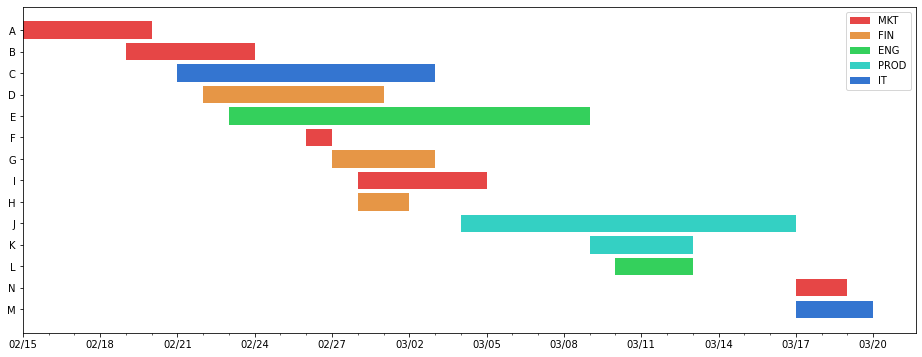

In [4]:
# create a column with the color for each department
def color(row):
    c_dict = {'MKT':'#E64646', 'FIN':'#E69646', 'ENG':'#34D05C', 'PROD':'#34D0C3', 'IT':'#3475D0'}
    return c_dict[row['Department']]
df['color'] = df.apply(color, axis=1)

from matplotlib.patches import Patch
fig, ax = plt.subplots(1, figsize=(16,6))
ax.barh(df.Task, df.days_start_to_end, left=df.start_num, color=df.color)

##### LEGENDS #####
c_dict = {'MKT':'#E64646', 'FIN':'#E69646', 'ENG':'#34D05C', 'PROD':'#34D0C3', 'IT':'#3475D0'}
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]

plt.legend(handles=legend_elements)

##### TICKS #####
xticks = np.arange(0, df.end_num.max()+1, 3)
xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")  
xticks_minor = np.arange(0, df.end_num.max()+1, 1)
#pd.interval_range
print(xticks_labels)

ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels[::3])
print(xticks_labels[::3])

plt.show()

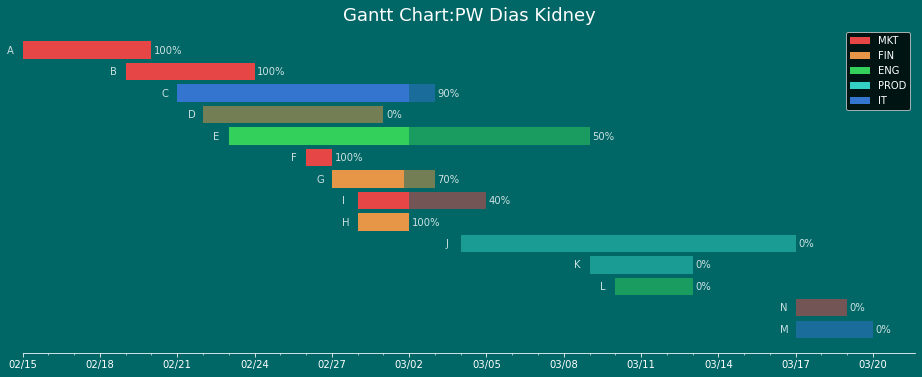

In [5]:
# days between start and current progression of each task
df['current_num'] = (df.days_start_to_end * df.Completion)

from matplotlib.patches import Patch

plt.style.use('dark_background')

fig, ax = plt.subplots(1, figsize=(16,6))

# bars
ax.barh(df.Task, df.current_num, left=df.start_num, color=df.color)
ax.barh(df.Task, df.days_start_to_end, left=df.start_num, color=df.color, alpha=0.5)

# texts adding %
for idx, row in df.iterrows():
    ax.text(row.end_num+0.1, idx, f"{int(row.Completion*100)}%", va='center', alpha=0.8)
    ax.text(row.start_num-0.6, idx, f"{row.Task}", va='center', alpha=0.8)

##### LEGENDS #####
c_dict = {'MKT':'#E64646', 'FIN':'#E69646', 'ENG':'#34D05C', 'PROD':'#34D0C3', 'IT':'#3475D0'}
legend_elements = [Patch(facecolor=c_dict[i], label=i)  for i in c_dict]
plt.legend(handles=legend_elements)
plt.title('Gantt Chart:PW Dias Kidney', size=18)

##### TICKS #####
xticks = np.arange(0, df.end_num.max()+1, 3)
xticks_labels = pd.date_range(proj_start, end=df.End.max()).strftime("%m/%d")
xticks_minor = np.arange(0, df.end_num.max()+1, 1)

ax.set_xticks(xticks)
ax.set_xticks(xticks_minor, minor=True)
ax.set_xticklabels(xticks_labels[::3])
ax.yaxis.set_visible(False)
ax.set_facecolor('#006666')
fig.set_facecolor('#006666')
#ax.axis('off')
ax.spines[["top", "right", 'left']].set_visible(False)

plt.show()